In [1]:
import pandas as pd

data = pd.read_csv("Car details v3.csv")
data.head()


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [3]:
del data['name']
del data['torque']

In [11]:
data['new'] = data['max_power'] ** 2

In [12]:

del data['max_power']

In [17]:
del data['mileage']

In [13]:
del data['engine']

In [4]:
del data['seats']

In [5]:
data['engine'] =  data['engine'].str.extract('(\d+)').astype(float)
data['max_power'] =  data['max_power'].str.extract('(\d+)').astype(float)
data['mileage'] =  data['mileage'].str.extract('(\d+)').astype(float)

In [6]:
data = data.replace(to_replace=['Automatic', 'Manual',], value=[1, 0])
data = data.replace(to_replace=['CNG', 'LPG', 'Petrol', 'Diesel'], value=[3, 2, 1, 0])
data = data.replace(to_replace=['Trustmark Dealer', 'Dealer', 'Individual'], value=[2, 1, 0])
data = data.replace(to_replace=['First Owner', 'Second Owner', 'Third Owner', 'Fourth & Above Owner', 'Test Drive Car'], value=[4, 3, 2, 1, 0])

In [7]:
data = data.fillna(data.mean ())

In [18]:
X_full = data.drop('selling_price', axis=1)
y_full = data['selling_price']

In [19]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X_full, y_full, test_size=0.2)

model = LinearRegression()
model.fit(Xtrain, ytrain)
pred_train = model.predict(Xtrain)
pred_test = model.predict(Xtest)
print(mean_squared_error(pred_test, ytest) ** 0.5, mean_squared_error(pred_train, ytrain) ** 0.5)

421056.247753965 421303.9788179886


<Axes: >

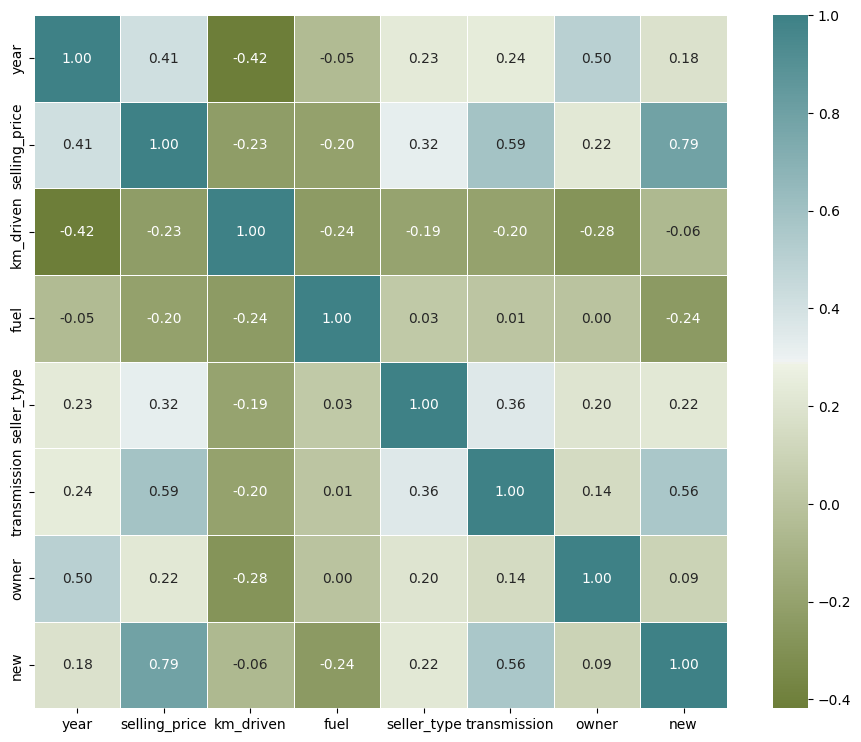

In [20]:
import seaborn as sns
import numpy as np
import matplotlib as plt


plt.pyplot.figure(figsize=(12,9))

corr = data.corr()

sns.heatmap(corr,annot=True,linewidths=.5,fmt= '.2f',\
            mask=np.zeros_like(corr, dtype=bool), \
            cmap=sns.diverging_palette(100,200,as_cmap=True), square=True)